In [9]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt 
import matplotlib.cm as cm 
import numpy as np
from scipy import stats

In [10]:
datos = pd.read_csv("https://raw.githubusercontent.com/AJVelezRueda/Fundamentos_de_informatica/master/Ciencia_de_datos/practicos/recursos/practico4.csv")
datos

,Fecha,Dirección IP,Actividad (en hs),Acceso a Facebook (en hs),Acceso a Instagram (en hs),Acceso a Twitch (en hs),Acceso a TikTok (en hs)
0,16/09/20,242.99.117.120,3.36,0.57,8.81,1.95,3.69
1,06/05/20,181174223110,4.28,2.91,9.66,3.45,4.06
2,01/10/21,58.54.184.167,5.62,2.60,6.95,1.94,4.77
3,01/03/17,135.79.184.226,5.83,2.15,7.82,2.03,4.19
4,01/02/21,248.230.40.6,4.59,1.79,11.67,1.46,5.39
...,...,...,...,...,...,...,...
1000,02/04/20,93.205.225.51,5.68,1.95,1.76,10.00,8.40
1001,07/02/19,43.55.114.100,4.62,2.05,2.53,5.55,10.96
1002,25/01/20,147.210.83.222,6.21,1.98,1.58,8.84,14.01
1003,03/07/17,117.69.141.168,4.69,2.41,1.70,9.35,8.83


In [11]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Fecha                       1005 non-null   object 
 1   Dirección IP                1005 non-null   object 
 2   Actividad (en hs)           1005 non-null   float64
 3   Acceso a Facebook (en hs)   1000 non-null   float64
 4   Acceso a Instagram (en hs)  990 non-null    float64
 5   Acceso a Twitch (en hs)     999 non-null    float64
 6   Acceso a TikTok (en hs)     950 non-null    float64
dtypes: float64(5), object(2)
memory usage: 55.1+ KB


<AxesSubplot:>

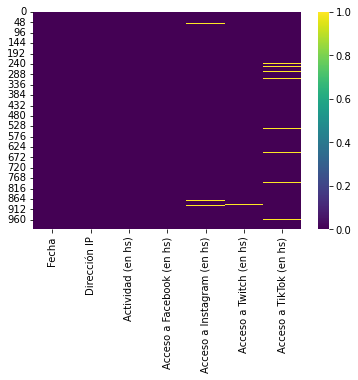

In [12]:
sns.heatmap(datos.isnull(), cmap = "viridis")

In [14]:
datos.columns

Index(['Fecha', 'Dirección IP', 'Actividad (en hs)',
       'Acceso a Facebook (en hs)', 'Acceso a Instagram (en hs)',
       'Acceso a Twitch (en hs)', 'Acceso a TikTok (en hs)'],
      dtype='object')

In [13]:
datos.describe()

,Actividad (en hs),Acceso a Facebook (en hs),Acceso a Instagram (en hs),Acceso a Twitch (en hs),Acceso a TikTok (en hs)
count,1005.000000,1000.000000,990.000000,999.000000,950.000000
mean,9.579622,3.707200,5.946747,5.158248,4.189189
std,5.721012,2.898833,3.962645,3.840922,2.815012
min,-2.060000,0.570000,0.450000,0.010000,0.060000
25%,4.810000,2.027500,2.100000,2.010000,2.162500
50%,8.030000,2.860000,6.385000,3.660000,3.605000
75%,14.000000,5.032500,9.377500,8.085000,5.147500
max,34.450000,37.060000,22.960000,23.680000,19.230000


In [ ]:
# INSPECCIONAR: VER QUE COLUMNAS TIENE, QUE TIPOS DE DATOS, CUANTOS NULOS. (INFO Y HEATMAP)
# CARACTERIZAR: DESCRIBE, SABER CUAL ES LA MEDIA, MINIMA (DESCRIBE)
# SOLO VEMOS LA TABLA ORIGINAL

In [ ]:
# LIMPIEZA DE DATOS
# CUANDO HAY UNA GRAN CANTIDAD DE DATOS NULOS, PUEDO RELLENARLOS POR LA MEDIA DE LA COLUMNA

MÉTODO PARA RELLENAR LOS DATOS NULOS POR SU MEDIA

df.fillna(df["columna_con_faltantes"].mean(), inplace= True)

In [17]:
columnas = list(datos.columns)
columnas

['Fecha',
 'Dirección IP',
 'Actividad (en hs)',
 'Acceso a Facebook (en hs)',
 'Acceso a Instagram (en hs)',
 'Acceso a Twitch (en hs)',
 'Acceso a TikTok (en hs)']

In [18]:
del(columnas[0:2])
# Con el del elimino de una lista las columnas que le estoy especificando.
# Elimina las no numéricas.

In [ ]:
# Las p al intentar normalizar dan 1 si las columnas tienen datos nulos.

In [19]:
def verificacion_de_medias(lista):
    test = {}
    for columna in lista:
        w , p = stats.shapiro(datos[columna].dropna())
        test[columna] = p
    return test

In [20]:
verificacion_de_medias(columnas)

{'Actividad (en hs)': 6.711347348290036e-20,
 'Acceso a Facebook (en hs)': 5.885453550164232e-44,
 'Acceso a Instagram (en hs)': 6.4553435431768035e-27,
 'Acceso a Twitch (en hs)': 8.659905969376384e-25,
 'Acceso a TikTok (en hs)': 2.721622484232854e-29}

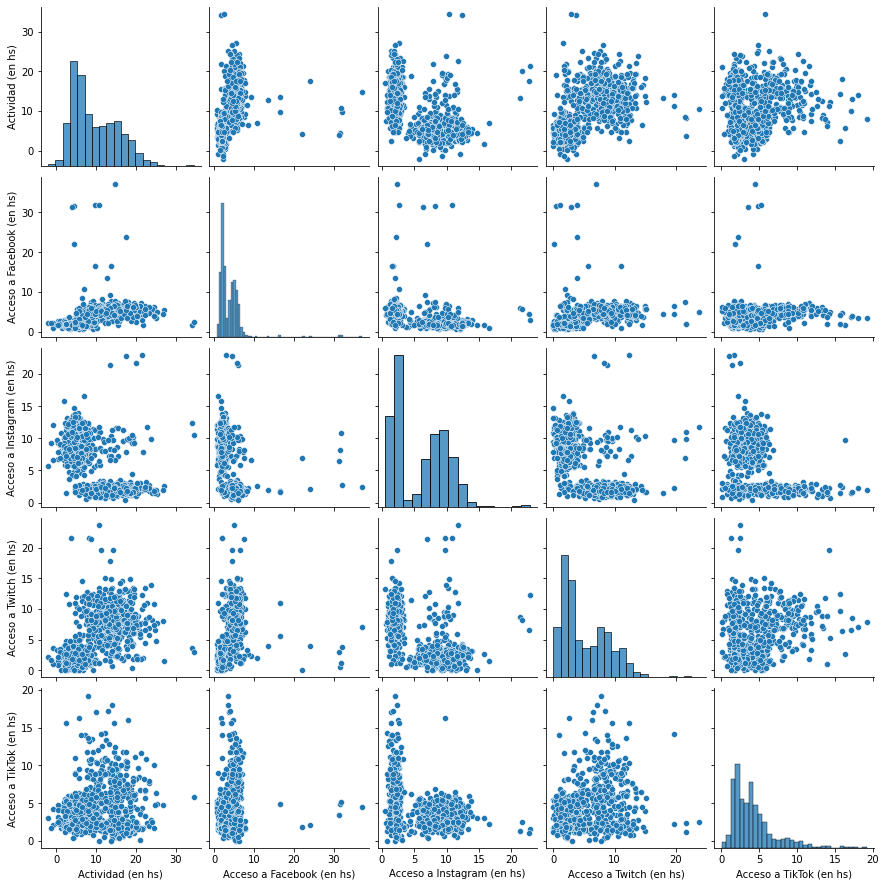

In [21]:
sns.pairplot(datos)

COMO TRABAJAR LAS POSIBLES ANOMALIAS

**OUTLIERS**

In [22]:
datos.quantile(0.05).to_dict

<bound method Series.to_dict of Actividad (en hs)             2.6800
Acceso a Facebook (en hs)     1.3800
Acceso a Instagram (en hs)    1.4245
Acceso a Twitch (en hs)       0.8300
Acceso a TikTok (en hs)       1.4100
Name: 0.05, dtype: float64>

In [23]:
# COMO CALCULAR LOS OUTLIERS!!!!!

Cs1 = datos["Actividad (en hs)"].quantile(0.95)
Ci1 = datos["Actividad (en hs)"].quantile(0.05)
Cs2 = datos["Acceso a Instagram (en hs)"].quantile(0.95)
Ci2 = datos["Acceso a Instagram (en hs)"].quantile(0.05)
#Averiguo el valor más chico y más grande de cada columna (los cuantiles)

datos1 = datos[(datos["Actividad (en hs)"] >= Ci1) & (datos["Actividad (en hs)"] <= Cs1) & (datos["Acceso a Instagram (en hs)"] >= Ci2) & (datos["Acceso a Instagram (en hs)"] <= Cs2)]
datos1
# En la última fórmula quedate con los datos que se encuentren entre los cuantiles que calculamos.

,Fecha,Dirección IP,Actividad (en hs),Acceso a Facebook (en hs),Acceso a Instagram (en hs),Acceso a Twitch (en hs),Acceso a TikTok (en hs)
0,16/09/20,242.99.117.120,3.36,0.57,8.81,1.95,3.69
1,06/05/20,181174223110,4.28,2.91,9.66,3.45,4.06
2,01/10/21,58.54.184.167,5.62,2.60,6.95,1.94,4.77
3,01/03/17,135.79.184.226,5.83,2.15,7.82,2.03,4.19
4,01/02/21,248.230.40.6,4.59,1.79,11.67,1.46,5.39
...,...,...,...,...,...,...,...
1000,02/04/20,93.205.225.51,5.68,1.95,1.76,10.00,8.40
1001,07/02/19,43.55.114.100,4.62,2.05,2.53,5.55,10.96
1002,25/01/20,147.210.83.222,6.21,1.98,1.58,8.84,14.01
1003,03/07/17,117.69.141.168,4.69,2.41,1.70,9.35,8.83


**DATOS NULOS**

In [24]:
datos2 = datos1.dropna().reset_index(drop = True) #Reinicia el index
datos2

,Fecha,Dirección IP,Actividad (en hs),Acceso a Facebook (en hs),Acceso a Instagram (en hs),Acceso a Twitch (en hs),Acceso a TikTok (en hs)
0,16/09/20,242.99.117.120,3.36,0.57,8.81,1.95,3.69
1,06/05/20,181174223110,4.28,2.91,9.66,3.45,4.06
2,01/10/21,58.54.184.167,5.62,2.60,6.95,1.94,4.77
3,01/03/17,135.79.184.226,5.83,2.15,7.82,2.03,4.19
4,01/02/21,248.230.40.6,4.59,1.79,11.67,1.46,5.39
...,...,...,...,...,...,...,...
742,02/04/20,93.205.225.51,5.68,1.95,1.76,10.00,8.40
743,07/02/19,43.55.114.100,4.62,2.05,2.53,5.55,10.96
744,25/01/20,147.210.83.222,6.21,1.98,1.58,8.84,14.01
745,03/07/17,117.69.141.168,4.69,2.41,1.70,9.35,8.83


In [25]:
# Los elimino con dropna o los relleno con el fillna (explicado más arriba)

In [27]:
datos3 = datos2.drop_duplicates().reset_index(drop= True)
datos3

,Fecha,Dirección IP,Actividad (en hs),Acceso a Facebook (en hs),Acceso a Instagram (en hs),Acceso a Twitch (en hs),Acceso a TikTok (en hs)
0,16/09/20,242.99.117.120,3.36,0.57,8.81,1.95,3.69
1,06/05/20,181174223110,4.28,2.91,9.66,3.45,4.06
2,01/10/21,58.54.184.167,5.62,2.60,6.95,1.94,4.77
3,01/03/17,135.79.184.226,5.83,2.15,7.82,2.03,4.19
4,01/02/21,248.230.40.6,4.59,1.79,11.67,1.46,5.39
...,...,...,...,...,...,...,...
742,02/04/20,93.205.225.51,5.68,1.95,1.76,10.00,8.40
743,07/02/19,43.55.114.100,4.62,2.05,2.53,5.55,10.96
744,25/01/20,147.210.83.222,6.21,1.98,1.58,8.84,14.01
745,03/07/17,117.69.141.168,4.69,2.41,1.70,9.35,8.83


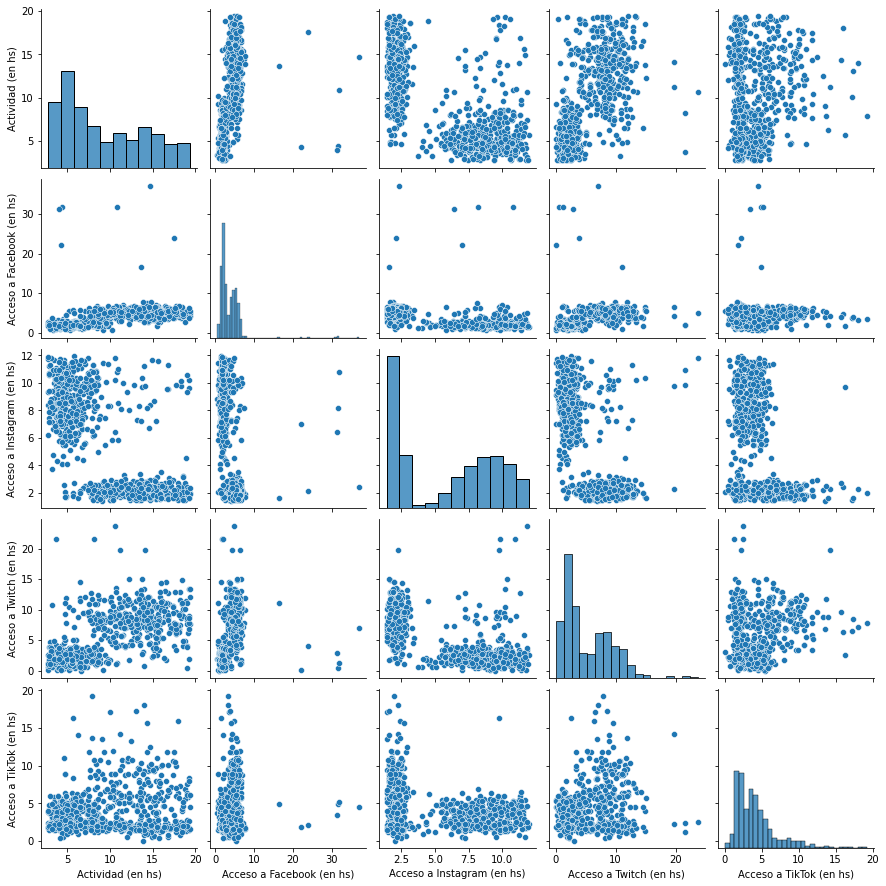

In [28]:
sns.pairplot(datos3)

In [30]:
# PASOS EN EL CASO DE QUE SEA NECESARIO REEMPLAZAR LOS NAN
# 1ero saco los duplicados
# 2do ouliers
# 3ero recién ahi puedo calcular la media "limpia" si necesitara rellenar los NaN

In [31]:
scaler = StandardScaler()
datos_escaleado = scaler.fit_transform(datos3[columnas])

In [33]:
def inercias_por_k(df_escalado):
    inercias = {}
    for i in range(1, 11):
        kmeans = KMeans(n_clusters= i, init= "random", n_init=10, max_iter= 300, random_state=1234567)
        kmeans.fit(df_escalado)
        inercias[i] = kmeans.inertia_
    return inercias

inercias = inercias_por_k(datos_escaleado)
inercias

#ME DA POR CADA GRUPO EL VALOR DE INERCIA

{1: 3735.0,
 2: 1977.004106789514,
 3: 1540.1508141973377,
 4: 1104.2767366399687,
 5: 970.2028479198829,
 6: 935.0988319703483,
 7: 828.6981872065891,
 8: 775.3301502973557,
 9: 714.5195980092084,
 10: 671.8956305004652}

In [38]:
df_inercias = pd.DataFrame(inercias.items(), columns= ["K", "inercia"])

<AxesSubplot:xlabel='K', ylabel='inercia'>

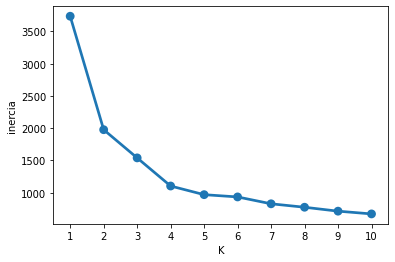

In [39]:
sns.pointplot(data = df_inercias, x = "K", y = "inercia")

In [40]:
# En este caso deberíamos verificar para el 2 y el 4. El silhouette es quien verificaba que la selección de grupos sea la correcta.

In [41]:
k = 2
kmeans = KMeans(n_clusters= k, init= "random", n_init=10, max_iter=300, random_state=1234567)
kmeans.fit(datos_escaleado)

KMeans(init='random', n_clusters=2, random_state=1234567)

<AxesSubplot:>

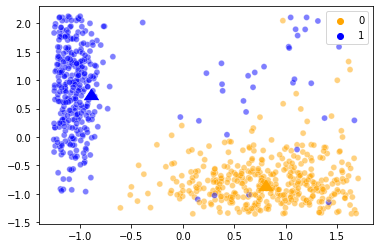

In [52]:
colores = ["orange", "blue"]
sns.scatterplot(x= datos_escaleado[:,2], y = datos_escaleado[:,0], hue= kmeans.labels_, palette = colores, alpha = 0.5)
sns.scatterplot(x= kmeans.cluster_centers_[:,2], y= kmeans.cluster_centers_[:,0], zorder= 10, palette = colores, hue= [0,1], legend = False, marker=6, s=200)

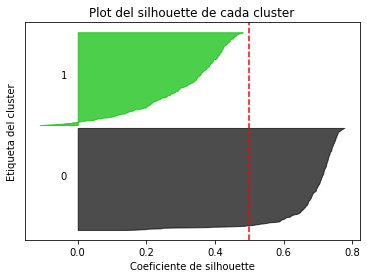

In [43]:
silhouette_avg = silhouette_score(datos_escaleado, kmeans.labels_)
sample_silhouette_values = silhouette_samples(datos_escaleado, kmeans.labels_)

def graficarSilhouette (k, labels, sample_silhouette_values, silhouette_avg):
  fig, ax1 = plt.subplots(1, 1)
  y_lower = 10
  for i in range(k):
      ith_cluster_silhouette_values = \
          sample_silhouette_values[labels == i]

      ith_cluster_silhouette_values.sort()

      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i

      color = cm.nipy_spectral(float(i) / k)
      ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
      ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
      y_lower = y_upper + 10

  ax1.set_title("Plot del silhouette de cada cluster")
  ax1.set_xlabel("Coeficiente de silhouette")
  ax1.set_ylabel("Etiqueta del cluster")
  ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
  ax1.set_yticks([])

graficarSilhouette (k, kmeans.labels_, sample_silhouette_values, silhouette_avg)

In [44]:
# Me dice si la división en grupos que realicé es correcta o no. Mientras más cercano a 1 mejor agrupamiento.
# Valores negativos: hay datos agrupados en el grupo 0 que no deberían estar ahi.